# PySR Clean Run


In [1]:
# Install libraries
%pip install -U pysr


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: /home/richard/Documents/p311a/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
#import pysr

In [3]:
# Call libraries
import numpy as np
#import pandas as pd
#from numpy import random
import sympy as sym
import matplotlib.pyplot as plt
from pysr import PySRRegressor
import time

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


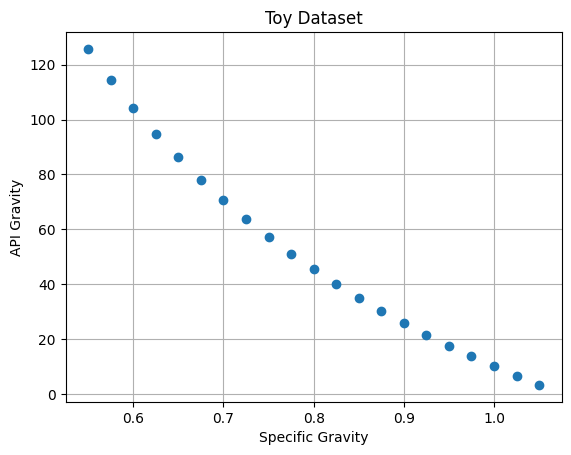

In [4]:
# Build Toy Dataset
x=np.arange(start=0.55,stop=1.075,step=0.025)
y=141.5/x-131.5
plt.plot(x,y,marker="o",linestyle="None")
plt.title("Toy Dataset")
plt.xlabel("Specific Gravity")
plt.ylabel("API Gravity")
plt.grid()
plt.show()

In [5]:
t0 = time.time()
myMod=PySRRegressor(random_state=7,deterministic=True,parallelism='serial')
myMod.fit(x.reshape(-1, 1),y)
y_pred=myMod.predict(x.reshape(-1, 1))
print("time to fit: ",time.time() - t0, 'seconds')

/home/richard/Documents/p311a/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
[ Info: Started!



Expressions evaluated per second: 9.720e+04
Progress: 541 / 3100 total iterations (17.452%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.321e+03  0.000e+00  y = 52.152
3           6.519e+02  3.532e-01  y = 44 / x₀
5           4.859e-11  1.511e+01  y = (141.5 / x₀) - 131.5
7           3.196e-11  2.095e-01  y = ((x₀ - -141.5) / x₀) + -132.5
11          2.055e-11  1.104e-01  y = 0.026039 - ((((x₀ * -4.1323) + 4.4457) / x₀) * -31.829...
                                      )
13          2.033e-11  5.363e-03  y = ((-132.05 - (-98.698 / x₀)) + (42.802 / x₀)) + (1.0489...
                                       - 0.49724)
19          7.474e-12  1.668e-01  y = (0.69577 + (((((x₀ - x₀) - ((x₀ * -4.2242) + 4.5215)) ...
                                      / x₀) * -31.295) - x₀)) + x₀


[ Info: Final population:
[ Info: Results saved to:


time to fit:  45.69720506668091 seconds
  - outputs/20250717_103109_nMPuB8/hall_of_fame.csv


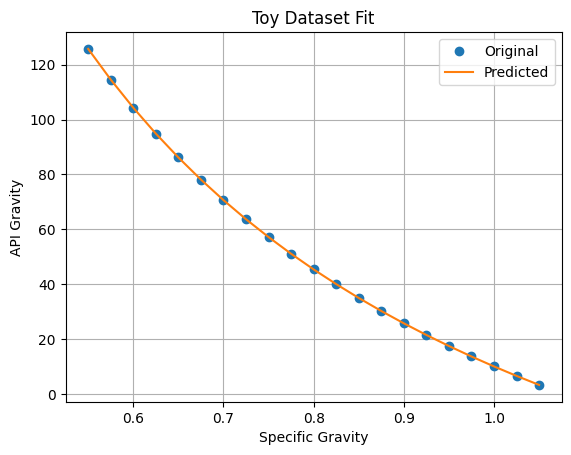

In [6]:
plt.plot(x,y,marker="o",linestyle="None",label="Original")
plt.plot(x,y_pred,label="Predicted")
plt.title("Toy Dataset Fit")
plt.xlabel("Specific Gravity")
plt.ylabel("API Gravity")
plt.legend()
plt.grid()
plt.show()

In [7]:
myEq=myMod.sympy()
myEq

x0 + x0 - (x0 + x0 + (4.521473 + x0*(-4.224167))*(-31.295113)/x0) + 0.6957725

In [8]:
sym.simplify(myEq)

-131.500011095871 + 141.500008461449/x0

In [9]:
x, y = sym.symbols('x y')
myTarg=sym.sympify(141.5/x-131.5)
myTarg

-131.5 + 141.5/x